In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [93]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [95]:
df['Species'] = iris.target

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df = df[df['Species'] != 0][['sepal width (cm)','petal length (cm)','Species']]

In [16]:
df.head()

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

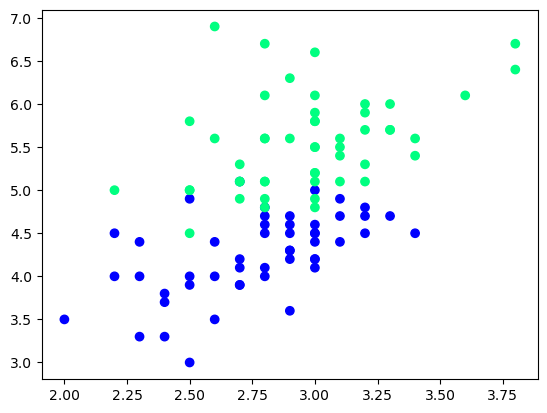

In [20]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['Species'],cmap='winter')

In [22]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal length (cm),Species
59,2.7,3.9,1
91,3.0,4.6,1
67,2.7,4.1,1
53,2.3,4.0,1
87,2.3,4.4,1
108,2.5,5.8,2
105,3.0,6.6,2
75,3.0,4.4,1
52,3.1,4.9,1
81,2.4,3.7,1


In [24]:
# taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [26]:
df_train

,sepal width (cm),petal length (cm),Species
54,2.8,4.6,1
144,3.3,5.7,2
81,2.4,3.7,1
134,2.6,5.6,2
130,2.8,6.1,2
136,3.4,5.6,2
83,2.7,5.1,1
115,3.2,5.3,2
143,3.2,5.9,2
106,2.5,4.5,2


In [28]:
df_val

,sepal width (cm),petal length (cm),Species
127,3.0,4.9,2
98,2.5,3.0,1
125,3.2,6.0,2
77,3.0,5.0,1
113,2.5,5.0,2


In [30]:
df_test

,sepal width (cm),petal length (cm),Species
103,2.9,5.6,2
74,2.9,4.3,1
66,3.0,4.5,1
86,3.1,4.7,1
93,2.3,3.3,1


In [36]:
X_test = df_val.iloc[:,1:2].values
y_test = df_val.iloc[:,-1].values

In [38]:
y_test

array([2, 1, 2, 1, 2])

# Case 1 -Bagging

In [41]:
# Data for tree 
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag

,sepal width (cm),petal length (cm),Species
143,3.2,5.9,2
115,3.2,5.3,2
115,3.2,5.3,2
134,2.6,5.6,2
83,2.7,5.1,1
143,3.2,5.9,2
54,2.8,4.6,1
81,2.4,3.7,1


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [47]:
dt_bag1 = DecisionTreeClassifier()

In [53]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

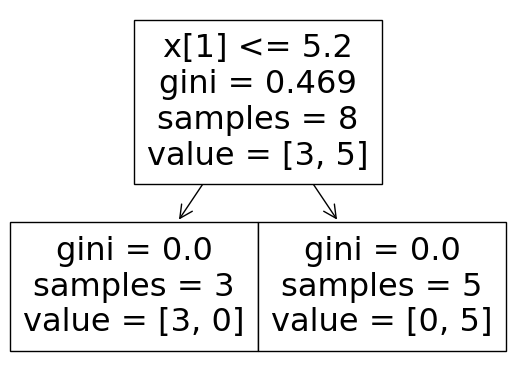

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but DecisionTreeClassifier is expecting 2 features as input.

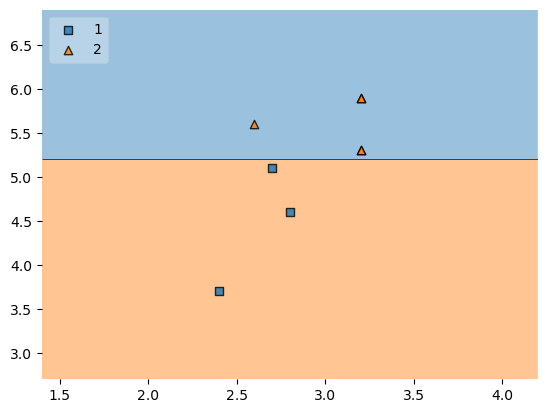

In [55]:
evaluate(dt_bag1,X,y)

In [57]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
106,2.5,4.5,2
134,2.6,5.6,2
134,2.6,5.6,2
130,2.8,6.1,2
144,3.3,5.7,2
106,2.5,4.5,2
143,3.2,5.9,2
54,2.8,4.6,1


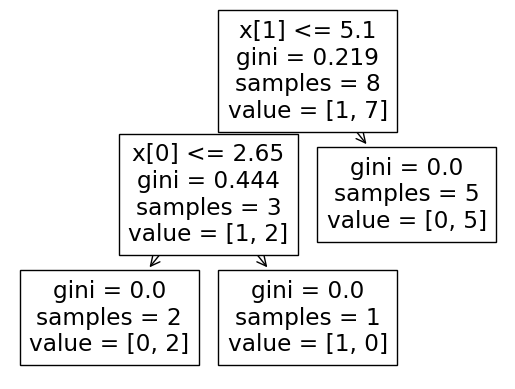

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but DecisionTreeClassifier is expecting 2 features as input.

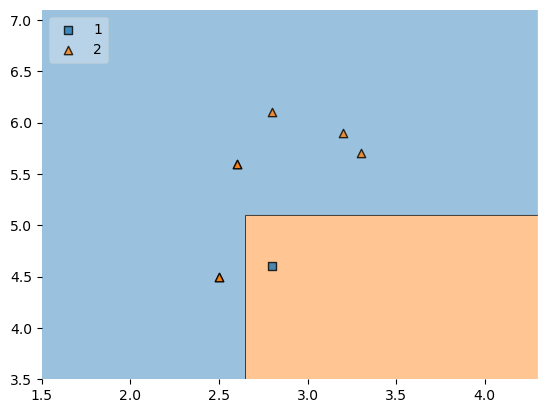

In [59]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

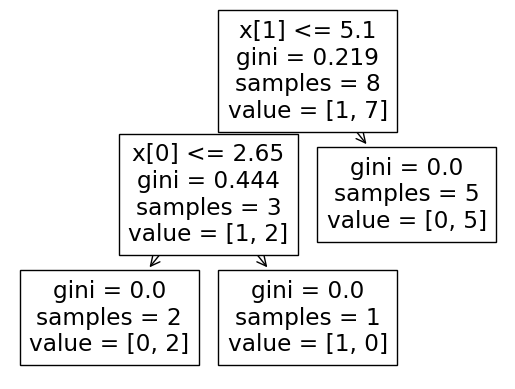

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but DecisionTreeClassifier is expecting 2 features as input.

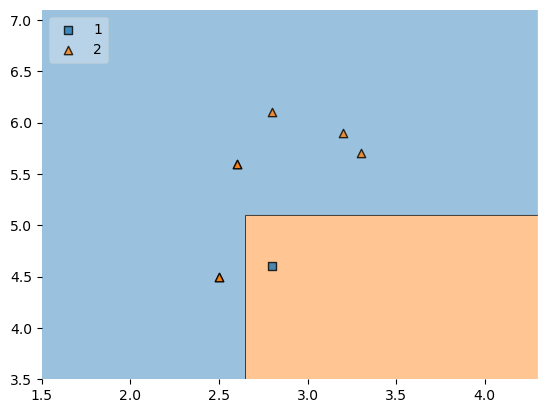

In [66]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [62]:
df_test

,sepal width (cm),petal length (cm),Species
103,2.9,5.6,2
74,2.9,4.3,1
66,3.0,4.5,1
86,3.1,4.7,1
93,2.3,3.3,1


In [68]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [71]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),Species
54,2.8,4.6,1
144,3.3,5.7,2
81,2.4,3.7,1
134,2.6,5.6,2
130,2.8,6.1,2
136,3.4,5.6,2
83,2.7,5.1,1
115,3.2,5.3,2
143,3.2,5.9,2
106,2.5,4.5,2


In [73]:
df_train.sample(8)

,sepal width (cm),petal length (cm),Species
144,3.3,5.7,2
54,2.8,4.6,1
136,3.4,5.6,2
115,3.2,5.3,2
106,2.5,4.5,2
130,2.8,6.1,2
83,2.7,5.1,1
81,2.4,3.7,1


# Random Subspaces

In [97]:
df1 = df.sample(10)

In [99]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
36,5.5,3.5,1.3,0.2,0
116,6.5,3.0,5.5,1.8,2
77,6.7,3.0,5.0,1.7,1
35,5.0,3.2,1.2,0.2,0
26,5.0,3.4,1.6,0.4,0
13,4.3,3.0,1.1,0.1,0
37,4.9,3.6,1.4,0.1,0
11,4.8,3.4,1.6,0.2,0
78,6.0,2.9,4.5,1.5,1
79,5.7,2.6,3.5,1.0,1


In [101]:
df1.sample(2,replace=True,axis=1)

,sepal length (cm),sepal width (cm)
36,5.5,3.5
116,6.5,3.0
77,6.7,3.0
35,5.0,3.2
26,5.0,3.4
13,4.3,3.0
37,4.9,3.6
11,4.8,3.4
78,6.0,2.9
79,5.7,2.6


In [103]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
36,5.5,3.5,1.3,0.2,0
116,6.5,3.0,5.5,1.8,2
77,6.7,3.0,5.0,1.7,1
35,5.0,3.2,1.2,0.2,0
26,5.0,3.4,1.6,0.4,0
13,4.3,3.0,1.1,0.1,0
37,4.9,3.6,1.4,0.1,0
11,4.8,3.4,1.6,0.2,0
78,6.0,2.9,4.5,1.5,1
79,5.7,2.6,3.5,1.0,1


In [105]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal length (cm),sepal width (cm)
13,1.1,3.0
37,1.4,3.6
13,1.1,3.0
37,1.4,3.6
79,3.5,2.6
116,5.5,3.0
78,4.5,2.9
11,1.6,3.4
